In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from kmodes.kprototypes import KPrototypes

**Read File**

In [49]:
# Load data
df = pd.read_csv('../input/heartdata2/heartdatak.csv',sep=',')
df.head()

,age,gender,cp,trestbps,chol,fbs,restech,thalach,exang,oldpeak,slope,ca,thal,class
0,32,1,1,95,0,?,0,127,0,0.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,0.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [50]:
print(df["age"].value_counts())
print(df["gender"].value_counts())
print(df["cp"].value_counts())
print(df["fbs"].value_counts())
print(df["restech"].value_counts())
print(df["thalach"].value_counts())
print(df["exang"].value_counts())
print(df["oldpeak"].value_counts())
print(df["slope"].value_counts())
print(df["ca"].value_counts())
print(df["thal"].value_counts())
print(df["class"].value_counts())

54    35
55    33
56    27
53    25
62    24
48    24
58    24
52    23
61    23
51    23
57    21
59    21
63    21
60    20
50    18
46    17
49    17
43    16
41    14
38    14
47    14
65    13
64    12
39    11
45    10
69    10
42    10
40    10
37     9
44     8
35     7
74     6
36     6
68     6
67     6
66     6
34     5
32     5
72     4
75     3
70     3
71     2
29     2
31     2
33     2
73     1
77     1
76     1
28     1
30     1
Name: age, dtype: int64
1    520
0     97
Name: gender, dtype: int64
4    352
2    124
3    118
1     23
Name: cp, dtype: int64
0    434
1     93
?     90
Name: fbs, dtype: int64
0    400
1    175
2     40
?      2
Name: restech, dtype: int64
?      55
150    36
140    35
120    32
130    26
       ..
161     1
69      1
88      1
73      1
91      1
Name: thalach, Length: 107, dtype: int64
0    324
1    238
?     55
Name: exang, dtype: int64
0       271
1        69
2        67
?        62
1.5      43
3        23
0.5      14
2.5      14
4      

In [51]:
df.ca = pd.to_numeric(df.ca, errors='coerce')
df.oldpeak = pd.to_numeric(df.oldpeak, errors='coerce')
df.exang = pd.to_numeric(df.exang, errors='coerce')
df.cp = pd.to_numeric(df.cp, errors='coerce')
df.fbs = pd.to_numeric(df.fbs, errors='coerce')
df.thal = pd.to_numeric(df.thal, errors='coerce')
df.trestbps = pd.to_numeric(df.trestbps, errors='coerce')
df.slope = pd.to_numeric(df.slope, errors='coerce')
df.restech = pd.to_numeric(df.restech, errors='coerce')
print (df)

     age  gender  cp  trestbps chol  fbs  restech thalach  exang  oldpeak  \
0     32       1   1      95.0    0  NaN      0.0     127    0.0      0.7   
1     34       1   4     115.0    0  NaN      NaN     154    0.0      0.2   
2     35       1   4       NaN    0  NaN      0.0     130    1.0      NaN   
3     36       1   4     110.0    0  NaN      0.0     125    1.0      1.0   
4     38       0   4     105.0    0  NaN      0.0     166    0.0      2.8   
..   ...     ...  ..       ...  ...  ...      ...     ...    ...      ...   
612   52       1   4     160.0  331  0.0      0.0      94    1.0      2.5   
613   54       0   3     130.0  294  0.0      1.0     100    1.0      0.0   
614   56       1   4     155.0  342  1.0      0.0     150    1.0      3.0   
615   58       0   2     180.0  393  0.0      0.0     110    1.0      1.0   
616   65       1   4     130.0  275  0.0      1.0     115    1.0      1.0   

     slope  ca  thal  class  
0      1.0 NaN   NaN      1  
1      1.0 NaN 

In [52]:
df.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,age,gender,cp,trestbps,chol,fbs,restech,thalach,exang,oldpeak,slope,ca,thal,class
0,32,1,1,95.00000,0,0.176471,0.000000,127,0.0,0.700000,1.000000,0.8,5.887218,1
1,34,1,4,115.00000,0,0.176471,0.414634,154,0.0,0.200000,1.000000,0.8,5.887218,1
2,35,1,4,132.37276,0,0.176471,0.000000,130,1.0,0.790991,1.938312,0.8,7.000000,3
3,36,1,4,110.00000,0,0.176471,0.000000,125,1.0,1.000000,2.000000,0.8,6.000000,1
4,38,0,4,105.00000,0,0.176471,0.000000,166,0.0,2.800000,1.000000,0.8,5.887218,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,52,1,4,160.00000,331,0.000000,0.000000,94,1.0,2.500000,1.938312,0.8,5.887218,1
613,54,0,3,130.00000,294,0.000000,1.000000,100,1.0,0.000000,2.000000,0.8,5.887218,1
614,56,1,4,155.00000,342,1.000000,0.000000,150,1.0,3.000000,2.000000,0.8,5.887218,1
615,58,0,2,180.00000,393,0.000000,0.000000,110,1.0,1.000000,2.000000,0.8,7.000000,1


In [66]:
print(df["age"].value_counts())
print(df["gender"].value_counts())
print(df["cp"].value_counts())
print(df["fbs"].value_counts())
print(df["restech"].value_counts())
print(df["thalach"].value_counts())
print(df["exang"].value_counts())
print(df["oldpeak"].value_counts())
print(df["slope"].value_counts())
print(df["ca"].value_counts())
print(df["thal"].value_counts())
print(df["class"].value_counts())

54    35
55    33
56    27
53    25
62    24
48    24
58    24
52    23
61    23
51    23
57    21
59    21
63    21
60    20
50    18
46    17
49    17
43    16
41    14
38    14
47    14
65    13
64    12
39    11
45    10
69    10
42    10
40    10
37     9
44     8
35     7
74     6
36     6
68     6
67     6
66     6
34     5
32     5
72     4
75     3
70     3
71     2
29     2
31     2
33     2
73     1
77     1
76     1
28     1
30     1
Name: age, dtype: int64
1    520
0     97
Name: gender, dtype: int64
4    352
2    124
3    118
1     23
Name: cp, dtype: int64
0.0    434
1.0     93
Name: fbs, dtype: int64
0.0    400
1.0    175
2.0     40
Name: restech, dtype: int64
?      55
150    36
140    35
120    32
130    26
       ..
161     1
69      1
88      1
73      1
91      1
Name: thalach, Length: 107, dtype: int64
0.0    324
1.0    238
Name: exang, dtype: int64
 0.0    271
 1.0     69
 2.0     67
 1.5     43
 3.0     23
 0.5     14
 2.5     14
 4.0      5
 1.3      4
 0.7    

# Exploratory Data Analysis

In [29]:
df.describe(include='all') 

,age,gender,cp,trestbps,chol,fbs,restech,thalach,exang,oldpeak,slope,ca,thal,class
count,617.000000,617.000000,617.000000,558.000000,617,527.000000,615.000000,617,562.000000,555.000000,308.000000,10.000000,133.000000,617.000000
unique,NaN,NaN,NaN,NaN,183,NaN,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,0,NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,172,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN
mean,53.055105,0.842788,3.294976,132.372760,NaN,0.176471,0.414634,NaN,0.423488,0.790991,1.938312,0.800000,5.887218,1.024311
std,9.582869,0.364296,0.913743,19.828097,NaN,0.381582,0.611066,NaN,0.494551,1.041776,0.575923,0.918937,1.612706,1.097988
min,28.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,0.500000,7.000000,1.000000
75%,60.000000,1.000000,4.000000,142.000000,NaN,0.000000,1.000000,NaN,1.000000,1.500000,2.000000,1.750000,7.000000,2.000000


In [53]:
df.isna().sum()

age           0
gender        0
cp            0
trestbps     59
chol          0
fbs          90
restech       2
thalach       0
exang        55
oldpeak      62
slope       309
ca          607
thal        484
class         0
dtype: int64

In [ ]:
#Fill missing values


In [31]:
#Dropping excessive columns with majo missing values and class
df.drop(columns=['class','ca', 'thal', 'slope'],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       617 non-null    int64  
 1   gender    617 non-null    int64  
 2   cp        617 non-null    int64  
 3   trestbps  558 non-null    float64
 4   chol      617 non-null    object 
 5   fbs       527 non-null    float64
 6   restech   615 non-null    float64
 7   thalach   617 non-null    object 
 8   exang     562 non-null    float64
 9   oldpeak   555 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 48.3+ KB


In [56]:
print(df.corr())

               age    gender        cp  trestbps       fbs   restech  \
age       1.000000  0.172682  0.205042  0.230336  0.296864  0.255421   
gender    0.172682  1.000000  0.261462  0.035480  0.110134  0.081976   
cp        0.205042  0.261462  1.000000  0.054319  0.081756  0.053072   
trestbps  0.230336  0.035480  0.054319  1.000000  0.151554  0.095622   
fbs       0.296864  0.110134  0.081756  0.151554  1.000000  0.235686   
restech   0.255421  0.081976  0.053072  0.095622  0.235686  1.000000   
exang     0.272467  0.184784  0.432921  0.191172  0.030610  0.066260   
oldpeak   0.277561  0.142046  0.288177  0.153220  0.092218  0.060251   
slope     0.138896  0.101572  0.132074  0.008453  0.126735  0.011068   
ca        0.704453       NaN -0.359937 -0.093600       NaN  0.646221   
thal      0.173643  0.152505  0.267211 -0.028167  0.133410  0.090597   
class     0.407033  0.281491  0.390886  0.103668  0.213869  0.147301   

             exang   oldpeak     slope        ca      thal     

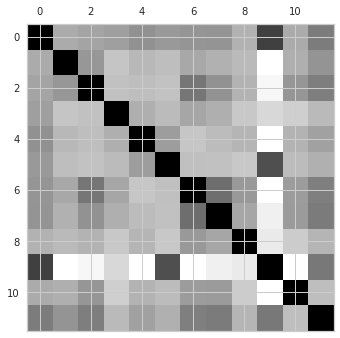

In [57]:
plt.matshow(df.corr())
plt.show()

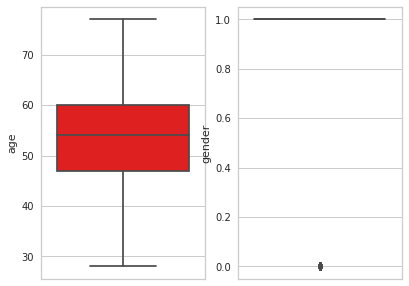

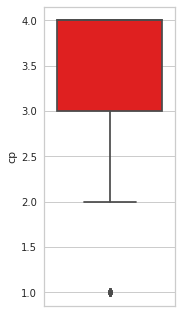

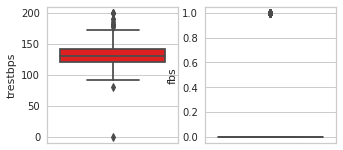

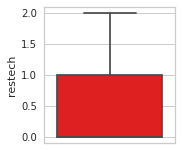

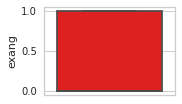

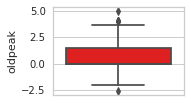

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(y=df["age"], color="red")
plt.subplot(1,3,2)
sns.boxplot(y=df["gender"], color="red")
plt.show()
plt.subplot(1,3,3)
sns.boxplot(y=df["cp"], color="red")
plt.show()
plt.subplot(2,3,1)
sns.boxplot(y=df["trestbps"], color="red")
plt.subplot(2,3,2)
sns.boxplot(y=df["fbs"], color="red")
plt.show()
plt.subplot(2,3,3)
sns.boxplot(y=df["restech"], color="red")
plt.show()
plt.subplot(3,3,1)
sns.boxplot(y=df["exang"], color="red")
plt.show()
plt.subplot(3,3,3)
sns.boxplot(y=df["oldpeak"], color="red")
plt.show()

In [60]:
gender = df.gender.value_counts()
genderlabel = ['Male', 'Female']

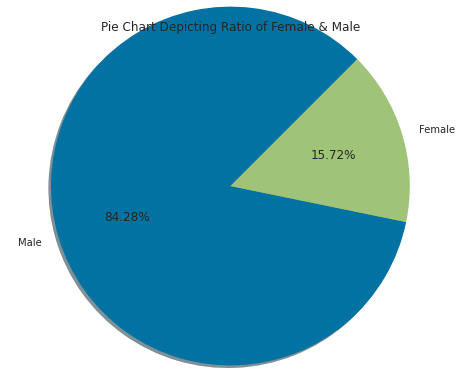

In [61]:
plt.axis('equal') # For perfect circle
plt.pie(gender, labels=genderlabel, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45)
# radius increase the size, autopct for show percentage two decimal point
plt.title('Pie Chart Depicting Ratio of Female & Male')
plt.show() 

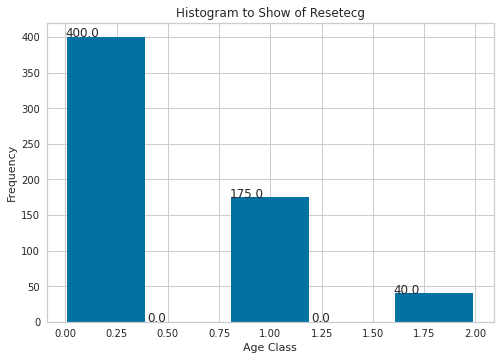

In [62]:
my_bins=5
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['restech'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Resetecg')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

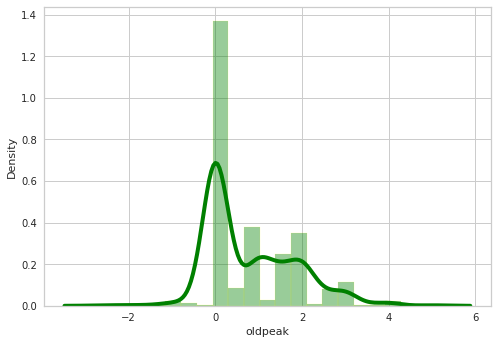

In [63]:
sns.distplot(df['oldpeak'], hist=True, kde=True, 
            color = 'green', 
             hist_kws={'edgecolor':'yellow'},
             kde_kws={'linewidth': 4})

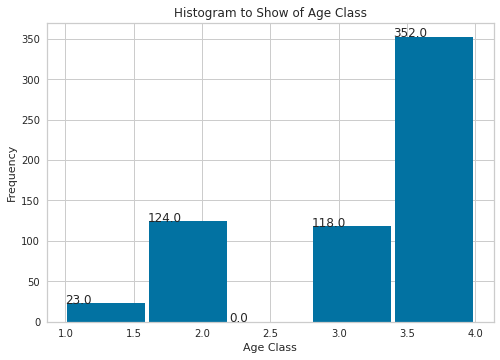

In [64]:
my_bins=5
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['cp'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

we can see the that features "Z_CostContact" and "Z_Revenue" are non-informative, contains only 1 value, thus w'll remove them.

In [65]:
df.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,age,gender,cp,trestbps,chol,fbs,restech,thalach,exang,oldpeak,slope,ca,thal,class
0,32,1,1,95.00000,0,0.176471,0.000000,127,0.0,0.700000,1.000000,0.8,5.887218,1
1,34,1,4,115.00000,0,0.176471,0.414634,154,0.0,0.200000,1.000000,0.8,5.887218,1
2,35,1,4,132.37276,0,0.176471,0.000000,130,1.0,0.790991,1.938312,0.8,7.000000,3
3,36,1,4,110.00000,0,0.176471,0.000000,125,1.0,1.000000,2.000000,0.8,6.000000,1
4,38,0,4,105.00000,0,0.176471,0.000000,166,0.0,2.800000,1.000000,0.8,5.887218,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,52,1,4,160.00000,331,0.000000,0.000000,94,1.0,2.500000,1.938312,0.8,5.887218,1
613,54,0,3,130.00000,294,0.000000,1.000000,100,1.0,0.000000,2.000000,0.8,5.887218,1
614,56,1,4,155.00000,342,1.000000,0.000000,150,1.0,3.000000,2.000000,0.8,5.887218,1
615,58,0,2,180.00000,393,0.000000,0.000000,110,1.0,1.000000,2.000000,0.8,7.000000,1


In [82]:
#Dropping excessive columns
df.drop(columns=['class','gender','oldpeak','ca','cp','trestbps','chol', 'exang', 'thal', 'restech', 'slope', 'fbs'],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      617 non-null    int64
 1   thalach  617 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


we can see that:

1. **Dt_Customer** is type object instead of DateTime.
2. **Education** and **Marital_Status** are categorical features- as there are in dtype: object. So w'll need to encode them into numeric forms later.
3. **Income** has missing values, w'll clean them.


# Feature Engineering

The max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

# **Data Cleaning**

In [ ]:
# treating NaN values
df.isna().sum()

In [ ]:
df.dropna(inplace = True)

There are a few outliers in the Income and Age features. I'll delete them.

**Looking at the correlation amongst the features**

(high correlation between "Total_Spent" and "Income","Total_Spent" and "Mnt.." which expected)

# Data Preprocessing

Preprocessing the data to perform clustering operations

**Encode categorical features**
* we use OrdinalEncoder for ordinal data
* OneHotEncoder for nominal(unordered) data

In [ ]:
# Encode ordinal features with OrdinalEncoder
education_order = ['Basic', '2n Cycle','Graduation','Master', 'PhD']
oe = OrdinalEncoder(categories = [education_order], dtype=int)
education_oe = oe.fit_transform(df[['Education']])
#df_enc= df.assign(Education_encode=education_oe)
#print(df_enc.shape)
#print(df_enc[['Education', 'Education_encode']])

In [ ]:
# Encode nominal features with OneHotEncoder
#ohe =  OneHotEncoder(sparse=False, dtype='int')
#Marital_ohe = ohe.fit_transform(df[['age','gender']])
#Marital_ohe = pd.DataFrame(data=(age,gender),columns=ohe.get_feature_names(['thalach']), index=df.index,)
#df_enc = pd.concat([df_enc,Marital_ohe],axis=1)
#df_enc.drop(columns=['thalach','age','gender'],inplace=True)

In [ ]:
df_enc.info()

All features are now numerical

**Features Scaling**

In [ ]:
# binary(dummy) features do not require normalisation
binary_columns = ['Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow'
                 ,'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_to_scaler = df_enc.drop(columns=binary_columns)

#scaling the features
scaler = StandardScaler().fit_transform(df_to_scaler)

#creating a dataframe and returning the binary features after scaling the numeric data
scaled_df = pd.DataFrame(scaler,columns= df_to_scaler.columns )
binary_series = df_enc[binary_columns]
scaled_df = pd.concat([scaled_df,binary_series],axis=1)

#filling the nan values generated
scaled_df.isna().sum()
scaled_df = scaled_df.fillna(0)

# Dimensionality reduction with PCA

In [ ]:
#Initiating PCA to reduce dimentions features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["feature1","feature2", "feature3"]))

In [ ]:
# A 3D Projection Of Data In The Reduced Dimension
plt.figure(figsize=(10,8))
plt.axes(projection='3d').scatter(PCA_df["feature1"], PCA_df["feature2"], PCA_df["feature3"])
plt.title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

**elbow curve - Plotting an elbow curve to find the optimum number of clusters**

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,11))
Elbow_M.fit(PCA_df)
Elbow_M.show()

The elbow score indicates that 4 will be an optimal number of clusters for this data.

**Silhouette score - Plotting a Silhouette score to find the optimum number of clusters**


In [ ]:
for k in range(2,11):
    model = KMeans(k)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(PCA_df) 
    visualizer.show()  

Looks like the silhouette also gives the best score with k= 2

# Agglomerative

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
scaled_df["Clusters"]= yhat_AC

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
plt.axes(projection='3d').scatter(PCA_df["feature1"], PCA_df["feature2"], PCA_df["feature3"], c=PCA_df["Clusters"], marker='o', cmap = 'viridis')
plt.title("The Plot Of The Clusters by Agglomerative model")


**Evaluation**

In [ ]:
pl = sns.scatterplot(data = scaled_df,x=scaled_df["Total_Spent"], y=scaled_df["Income"],hue=scaled_df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# DBSCAN

In [ ]:
#Initiating the BBSCAN Clustering model 
DB = DBSCAN(eps=0.1, min_samples=5)
# fit model and predict clusters
labels = DB.fit_predict(PCA_df)
PCA_df["Clusters"] = labels
#Adding the Clusters feature to the orignal dataframe.
scaled_df["Clusters"]= labels

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(PCA_df["feature1"], PCA_df["feature2"], PCA_df["feature3"], c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters by DBSCAN model ")
plt.show()

# K-Means

In [ ]:
#Initiating the KMeans Clustering model 
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 50)
# fit model and predict clusters
labels = kmeans.fit_predict(PCA_df)
PCA_df["Clusters"] = labels
#Adding the Clusters feature to the orignal dataframe.
scaled_df["Clusters"]= labels


#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df["feature1"], PCA_df["feature2"], PCA_df["feature3"], s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# GMM

In [ ]:
#Initiating the GMM Clustering model 
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(PCA_df)
# fit model and predict clusters
labels = gmm.predict(PCA_df)
PCA_df["Clusters"] = labels
#Adding the Clusters feature to the orignal dataframe.
scaled_df["Clusters"]= labels

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_df["feature1"], PCA_df["feature2"], PCA_df["feature3"], s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# K-Prototypes

Now I'll try to run K-Prototypes model.

"K-prototypes" is a clustering method based on partitioning. Its algorithm is an improvement of the K-Means and K-Mode clustering algorithm to handle clustering with the mixed data types - data with a mix of categorical and numeric features.
It uses a distance measure which mixes the Hamming distance for categorical features and the Euclidean distance for numeric features.

I will make a copy of the original df for this model, since there is no need to perform encoding to the categorical features.

In [ ]:
df_copy = df

**Scaling numerical features**

In [ ]:
numerical_col = ['Age','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
             'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Total_Spent','days_engaged']

scaled_numerical = StandardScaler().fit_transform(df_copy[numerical_col])
df_copy[numerical_col] = scaled_numerical

In [84]:
# K-prototypes model gets a numpy array, thus converting the df to an array
df_to_array = df_copy.values

#converting numerical columns datatype as float
numerical_col_index = [0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,25,26]
df_to_array[:,numerical_col_index] = df_to_array[:,numerical_col_index].astype(float)

#index of categorical columns
categorical_index = list(range(1,3)) + list(range(18,25))

NameError: name 'df_copy' is not defined

In [ ]:
# Initiating the KPrototypes Clustering model 
KPro = KPrototypes(n_clusters=4, init='Huang', random_state=42, n_jobs=-1)
# fit model and predict clusters
KPro.fit_predict(df_to_array, categorical=categorical_index)
print(KPro.cost_)
#new column for cluster labels associated with each subject
df_copy['clusters'] = KPro.labels_

some evaluations:

In [ ]:
pd.set_option('max_rows',None)
df_copy['clusters'] = KPro.labels_
df_copy.groupby('clusters').agg(['median' ,'mean']).T

In [ ]:
pl = sns.scatterplot(data = df_copy,x=df_copy["Total_Spent"], y=df_copy["Income"],hue=df_copy['clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()